In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file from CelesTrack
# https://www.celestrak.com/pub/satcat.csv 
csv_file = "satcat.csv"
satcat_data = pd.read_csv(csv_file)

satcat_data.head()


,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE
0,SL-1 R/B,1957-001A,1,R/B,D,CIS,1957-10-04,TYMSC,1957-12-01,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP
3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaN,132.61,34.25,3822.0,650.0,0.122,NaN,EA,ORB


In [3]:
# Load JSON with countries file, from space-track.org
json_file = "Space-Track-includesCountry.json"
space_track_data = pd.read_json(json_file)

space_track_data.head()


,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,2025-044A,63156,PAYLOAD,CSO-3,FR,2025-03-06,FRGUI,None,NaN,NaN,...,0,None,9067,2025,44,A,Y,CSO-3,2025-044A,63156
1,2025-042A,63130,PAYLOAD,COSMOS 2584(GLONASS),CIS,2025-03-02,PKMTR,None,676.44,64.82,...,0,LARGE,9066,2025,42,A,Y,COSMOS 2584(GLONASS),2025-042A,63130
2,2025-039B,63105,PAYLOAD,STARLINK-11624,US,2025-02-27,AFETR,None,90.89,43.00,...,0,LARGE,9066,2025,39,B,Y,STARLINK-11624,2025-039B,63105
3,2025-039C,63106,PAYLOAD,STARLINK-11584,US,2025-02-27,AFETR,None,90.89,43.00,...,0,LARGE,9066,2025,39,C,Y,STARLINK-11584,2025-039C,63106
4,2025-039E,63108,PAYLOAD,STARLINK-11632,US,2025-02-27,AFETR,None,90.89,43.00,...,0,LARGE,9066,2025,39,E,Y,STARLINK-11632,2025-039E,63108


In [4]:
# Ensure NORAD_CAT_ID is treated as a string in both datasets
satcat_data["NORAD_CAT_ID"] = satcat_data["NORAD_CAT_ID"].astype(str)
space_track_data["NORAD_CAT_ID"] = space_track_data["NORAD_CAT_ID"].astype(str)

# Merge datasets, focusing on adding COUNTRY information from JSON to CSV
merged_data = pd.merge(satcat_data, space_track_data[['NORAD_CAT_ID', 'COUNTRY']], 
                       on="NORAD_CAT_ID", how="left")

# Display merged data
merged_data.head()

# df_merged.to_csv("/mnt/data/merged_satellite_data.csv", index=False)

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE,COUNTRY
0,SL-1 R/B,1957-001A,1,R/B,D,CIS,1957-10-04,TYMSC,1957-12-01,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP,NaN
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP,CIS
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP,CIS
3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP,US
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaN,132.61,34.25,3822.0,650.0,0.122,NaN,EA,ORB,US


In [5]:
# print(merged_data["COUNTRY"].unique())
country_counts = merged_data["COUNTRY"].value_counts()
pd.set_option("display.max_rows", None)  # Ensure all rows are shown
print(country_counts)

COUNTRY
US      12067
CIS      3701
PRC      1007
UK        746
JPN       316
IND       148
FR        133
ESA       119
GER       119
CA         97
ITSO       93
GLOB       84
IT         83
SES        77
SPN        74
ARGN       67
EUTE       62
ORB        59
AUS        57
SKOR       48
ISRA       42
TURK       37
FIN        35
BRAZ       34
TWN        28
SING       25
NZ         24
SWTZ       22
UAE        22
NOR        22
INDO       22
O3B        20
IM         20
LUXE       19
POL        18
AB         16
DEN        16
SAUD       15
BEL        15
NETH       15
THAI       14
LTU        14
SWED       14
EGYP       13
MEX        12
SAFR       11
IRAN       11
EUME       10
MALA        9
CZE         9
PAKI        9
RP          8
NATO        8
HUN         8
RWA         8
KAZ         8
UKR         8
AC          8
CHLE        7
ESRO        7
ISS         6
NIG         6
BGR         6
ALG         6
ABS         5
VTNM        5
GREC        5
ASRA        4
MA          4
TBD         4
CHBZ        

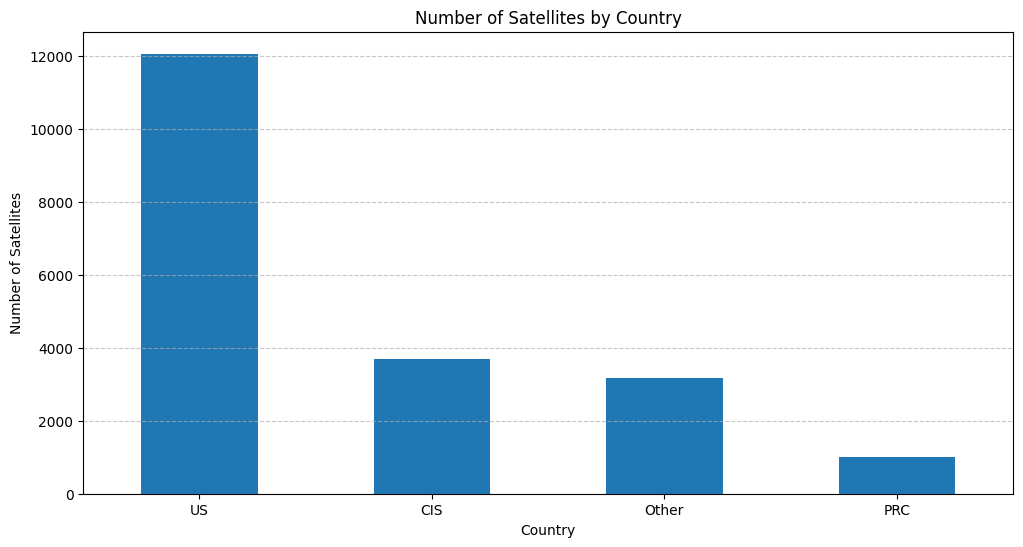

In [6]:
# Count # from each country
country_counts = merged_data["COUNTRY"].value_counts()
major_countries = {"US", "CIS", "PRC"}

filtered_countries = country_counts.index.map(lambda x: x if x in major_countries else "Other")
final_counts = country_counts.groupby(filtered_countries).sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
final_counts.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Number of Satellites")
plt.title("Number of Satellites by Country")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


## Next, add mission functions
1. Weather, Earth Resources
2. Communications
3. Navigation
4. Scientific
5. Miscellaneous

In [30]:
# Additional Mission Functions: https://celestrak.org/NORAD/elements/index.php?FORMAT=json
# WEATHER SATELLITES
# check if any weather files have all NORAD IDs (no)
folder_path = "weather"

file_norad_ids = {}
all_norad_ids = set()

# Load each JSON file and extract NORAD_CAT_IDs
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        file_path = os.path.join(folder_path, filename)
        
        df = pd.read_json(file_path)
            
        # Ensure the NORAD_CAT_ID column exists
        if "NORAD_CAT_ID" in df.columns:
            norad_ids = set(df["NORAD_CAT_ID"].dropna())  # Remove NaN values
            
            file_norad_ids[filename] = norad_ids
            all_norad_ids.update(norad_ids)

# Check if any file contains ALL NORAD IDs
file_containing_all = None
for filename, norad_ids in file_norad_ids.items():
    if norad_ids == all_norad_ids:
        file_containing_all = filename
        break

# Output results
if file_containing_all:
    print(f"Hip hip hooray! {file_containing_all} contains all NORAD IDs across all files I wanted")
else:
    print("Bruh none have all of the desired weather NORAD IDs")

# Check for duplicate NORAD IDs across files
# from collections import defaultdict

# # Define the folder containing the JSON files
# folder_path = "weather" 

# # Dictionary to track NORAD IDs and which files they appear in
# norad_tracker = defaultdict(list)

# # Loop through all JSON files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".json"):  # Only process JSON files
#         file_path = os.path.join(folder_path, filename)
        
#         # Load JSON file
#         try:
#             df = pd.read_json(file_path)
            
#             # Ensure the NORAD_CAT_ID column exists
#             if "NORAD_CAT_ID" in df.columns:
#                 for norad_id in df["NORAD_CAT_ID"]:
#                     norad_tracker[norad_id].append(filename)
#         except Exception as e:
#             print(f"Error reading {filename}: {e}")

# # Convert the NORAD tracker to a DataFrame
# df_duplicates = pd.DataFrame([(norad, files) for norad, files in norad_tracker.items() if len(files) > 1], 
#                              columns=["NORAD_CAT_ID", "Files_Appearing_In"])

# print(df_duplicates)

Bruh none have all of the desired weather NORAD IDs


In [ ]:
# Merge all weather-related NORADIDs, under the additional detail of mission function "weather"

weather_norad_ids = set()
for filename in os.listdir("weather"):
    if filename.endswith(".json"):
        file_path = os.path.join("weather", filename)
        
        df_weather = pd.read_json(file_path, dtype={'NORAD_CAT_ID': str})
        # add existing norad to set
        if "NORAD_CAT_ID" in df_weather.columns:
            weather_norad_ids.update(df_weather["NORAD_CAT_ID"].dropna().unique())  # Collect unique IDs

# Add a new column "MISSION_FUNCTION" and set default to "Unknown"
merged_data["MISSION_FUNCTION"] = "Unknown"

# if in weather dataset, then it's "Weather"
merged_data.loc[merged_data["NORAD_CAT_ID"].isin(weather_norad_ids), "MISSION_FUNCTION"] = "Weather"

# Find NORAD IDs that are in the weather dataset but missing from the big dataset
missing_norads = weather_norad_ids - set(merged_data["NORAD_CAT_ID"])
if missing_norads:
    print("these NORAD IDs are in the weather files but not in the big dataset :(")
    print(missing_norads)
else:
    print("hooray! all weather NORAD IDs are in the big dataset\n")

# print(merged_data.head(10))
# https://celestrak.org/NORAD/elements/table.php?GROUP=weather&FORMAT=json
print("Check that NORAD 25448 (example) is weather:")
print(merged_data.iloc[25337])

hooray! all weather NORAD IDs are in the big dataset

Check that NORAD 25448 (example) is weather:
OBJECT_NAME            NOAA 15
OBJECT_ID            1998-030A
NORAD_CAT_ID             25338
OBJECT_TYPE                PAY
OPS_STATUS_CODE              B
OWNER                       US
LAUNCH_DATE         1998-05-13
LAUNCH_SITE              AFWTR
DECAY_DATE                 NaN
PERIOD                  100.92
INCLINATION              98.55
APOGEE                   809.0
PERIGEE                  796.0
RCS                      5.292
DATA_STATUS_CODE           NaN
ORBIT_CENTER                EA
ORBIT_TYPE                 ORB
COUNTRY                     US
MISSION_FUNCTION       Weather
Name: 25337, dtype: object
